In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
df = pd.read_csv('CreditScoring.csv')

In [73]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [74]:
df.columns =df.columns.str.lower()

In [75]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [76]:
for c in['income','assets','debt']:
    df[c] = df[c].replace(to_replace=99999999,value=0)

In [77]:
df=df[df.status!='unk'].reset_index(drop=True)

In [78]:
df['default'] = (df.status == 'default').astype(int)
del df['status']

In [79]:
df.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,9,rent,60,30,married,no,freelance,73,129,0,0,800,846,0
1,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658,0
2,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985,1
3,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325,0
4,0,rent,36,26,single,no,fixed,46,107,0,0,310,910,0


In [80]:
numeric = ['seniority','time','age','expenses','income','assets','debt','price']
categorical = ['home','marital','records','job']

In [82]:
from sklearn.model_selection import train_test_split


In [83]:
df_full_train , df_test = train_test_split(df,test_size=0.2,random_state=1)
df_train , df_val = train_test_split(df_full_train,test_size=0.25,random_state=1)

In [85]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
1877,12,private,24,28,married,no,fixed,45,102,0,0,700,1229,1
1803,4,other,60,28,married,no,fixed,60,143,0,0,1150,1630,0
3400,0,owner,60,27,married,no,fixed,35,295,6000,0,1950,2208,0
3529,6,owner,48,28,married,no,fixed,45,114,3500,0,650,1255,0
1721,12,owner,36,42,married,no,freelance,60,0,15000,0,1000,1500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,0,rent,48,54,married,no,freelance,135,0,0,0,2000,2476,1
1956,6,rent,12,33,married,no,fixed,85,250,0,0,500,1500,0
91,9,parents,60,32,single,yes,fixed,35,105,0,0,1490,1490,1
3602,0,parents,60,21,single,no,others,35,149,3000,0,1400,1829,0


In [87]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.default.values
y_val = df_val.default.values
y_test = df_test.default.values

del df_train['default']
del df_val['default']
del df_test['default']

## Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

-    For each numerical variable, use it as score and compute AUC with the "default" variable
-    Use the training dataset for that

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['expenses'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

-    seniority
-    time
-    income
-    debt


In [108]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

C:\Users\Piyush Sharma\Desktop\ZCMP_CAR\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Piyush Sharma\Desktop\ZCMP_CAR\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


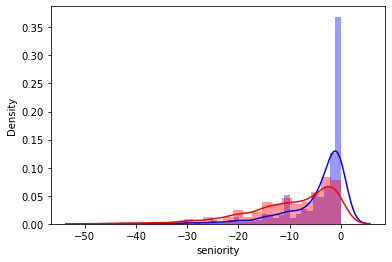

In [117]:
sns.distplot(-df_train.seniority[y_train==1],color='blue')
sns.distplot(-df_train.seniority[y_train==0],color='red');

In [118]:
fpr,tpr,_ = roc_curve(y_train,-df_train.seniority)

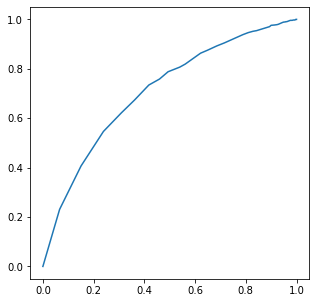

In [119]:
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr);

In [122]:
for c in numeric:
    auc = roc_auc_score(y_train  , df_train[c])
    if auc<0.5:
        auc = roc_auc_score(y_train  , -df_train[c])
    print(c,auc)

seniority 0.7093778624491943
time 0.5608662489595051
age 0.5732933272499939
expenses 0.5009184217217011
income 0.682006666132633
assets 0.6486042567122802
debt 0.5047829675783548
price 0.5043329862114843


### Answer: seniority

## Training the model

From now on, use these columns only:

`['seniority', 'income', 'assets', 'records', 'job', 'home']`

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

`LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`


In [123]:
columns

Index(['seniority', 'home', 'time', 'age', 'marital', 'records', 'job',
       'expenses', 'income', 'assets', 'debt', 'amount', 'price', 'default'],
      dtype='object')

In [125]:
df_train = df_train.drop(['time', 'age', 'marital','expenses', 'amount','price','debt'],axis=1)
df_val = df_val.drop(['time', 'age', 'marital','expenses', 'amount','price','debt'],axis=1)
df_test = df_test.drop(['time', 'age', 'marital','expenses', 'amount','price','debt'],axis=1)

In [126]:
df_train.head()

,seniority,home,records,job,income,assets
0,12,private,no,fixed,102,0
1,4,other,no,fixed,143,0
2,0,owner,no,fixed,295,6000
3,6,owner,no,fixed,114,3500
4,12,owner,no,freelance,0,15000


In [129]:
categorical = ['home','records','job']
numerical = ['seniority','income','assets']

In [130]:
from sklearn.feature_extraction import DictVectorizer

In [131]:
dv = DictVectorizer(sparse=True)

In [141]:
train_dicts = df_train[categorical+numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

In [142]:
val_dicts = df_val[categorical+numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [143]:
from sklearn.linear_model import LogisticRegression

In [144]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [145]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [148]:
y_pred = model.predict_proba(X_val)[:,1]

In [150]:
round(roc_auc_score(y_val,y_pred),3)

0.812

## Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

-    0.512
-    0.612
-    0.712
-    0.812


### Answer: 0.812

## Question 3

Now let's compute precision and recall for our model.

-    Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
-    For each threshold, compute precision and recall
-    Plot them

At which threshold precision and recall curves intersect?

-    0.2
-    0.4
-    0.6
-    0.8


In [153]:
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [154]:
df_scores = confusion_matrix_dataframe(y_val,y_pred)

In [160]:
df_scores['p'] = df_scores.tp/(df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp/(df_scores.tp + df_scores.fn)

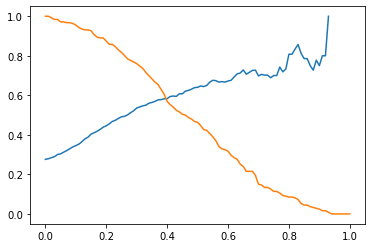

In [161]:
plt.plot(df_scores.threshold,df_scores.p)
plt.plot(df_scores.threshold,df_scores.r)

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

F1 = 2 * P * R / (P + R)

Where P is precision and R is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

-    0.1
-    0.3
-    0.5
-    0.7


In [162]:
def f1(p,r):
    f1_score = 2*p*r/(p+r)
    return f1_score

In [165]:
np.max(f1(df_scores.p,df_scores.r))

0.6285714285714286

In [166]:
df_scores['f1'] = 2 * df_scores.p * df_scores.r / (df_scores.p + df_scores.r)

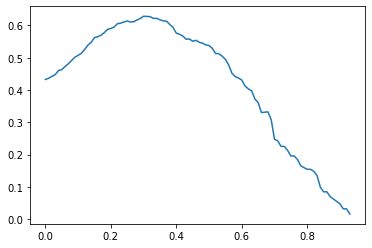

In [168]:
plt.plot(df_scores.threshold,df_scores.f1)

In [169]:
df_scores.iloc[df_scores.f1.argmax()]

threshold      0.300000
tp           187.000000
fp           162.000000
fn            59.000000
tn           483.000000
tpr            0.760163
fpr            0.251163
p              0.535817
r              0.760163
f1             0.628571
Name: 30, dtype: float64

### Answer: 0.3

## Question 5

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)

-    Iterate over different folds of df_full_train
-    Split the data into train and validation
-    Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
-    Use AUC to evaluate the model on validation

How large is standard devidation of the AUC scores across different folds?

-    0.001
-    0.014
-    0.09
-    0.14


In [170]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [173]:
from sklearn.model_selection import KFold

In [175]:
kfold = KFold(n_splits=5,shuffle=True,random_state=1)

In [180]:
scores = []

for train_idx , val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    y_train = df_train.default.values
    y_val = df_val.default.values
    
    dv, model = train(df_train,y_train,C=1.0)
    y_pred = predict(df_val,dv,model)
    
    auc = roc_auc_score(y_val,y_pred)
    scores.append(auc)
    
print('%.3f +- %.3f' %(np.mean(scores),np.std(scores)))

0.796 +- 0.038


In [181]:
scores

[0.8248490248490249,
 0.8233418747392884,
 0.7828118772419291,
 0.8204319459183274,
 0.7267077219967648]

## Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

-    Iterate over the following C values: [0.01, 0.1, 1, 10]
-    Initialize KFold with the same parameters as previously
-    Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
-    Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

-    0.01
-    0.1
-    1
-    10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

In [191]:
kfold = KFold(n_splits=5,shuffle=True,random_state=1)

for C in [0.01,0.1,1,10]:
    
    scores=[]

    for train_idx, val_idx in kfold.split(df_full_train):
            df_train = df_full_train.iloc[train_idx]
            df_val = df_full_train.iloc[val_idx]

            y_train = df_train.default.values
            y_val = df_val.default.values

            dv, model = train(df_train, y_train, C=C)
            y_pred = predict(df_val, dv, model)

            auc = roc_auc_score(y_val, y_pred)
            scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))



C=0.01 0.795 +- 0.025
C=0.1 0.811 +- 0.016
C=1 0.796 +- 0.038
C=10 0.796 +- 0.038


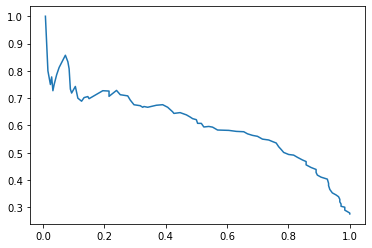

In [194]:
plt.plot(df_scores.r,df_scores.p)